In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette('colorblind')

In [2]:
featuremap = {
    '(Intercept)': 'Intercept',
    'sentiment_prob_pos': 'Positive Sentiment',
    'sentiment_prob_neg': 'Negative Sentiment',
    'lexdiv_cttr': 'Lexical Diversity',
    'num_punct': '# Punctuation Marks',
    'num_sentences': '# Sentences',
    'SMOG_readability': 'Readability',
    'second_personTRUE': 'Text Uses 2nd Person Pronouns',
    'user_follower': 'Author Follower Count',
    'level_in_tree': 'Comment Level in Tree',
    'cosine_1': 'Topical Similarity to Article',
    'hours_since_article': 'Time Since Article Publication',
    'votes_pos_mean': 'Mean Upvotes in Discussion',
    'votes_neg_mean': 'Mean Downvotes in Discussion',
    'article_comments': '# Comments in Discussion',
    'factor(genre1)/diestandard': 'Genre: Women\'s Issues',
    'factor(genre1)/diskurs': 'Genre: Opinion',
    'factor(genre1)/etat': 'Genre: Media',
    'factor(genre1)/international': 'Genre: International',
    'factor(genre1)/kultur': 'Genre: Culture',
    'factor(genre1)/lifestyle': 'Genre: Lifestyle',
    'factor(genre1)/panorama': 'Genre: Panorama',
    'factor(genre1)/podcast': 'Genre: Podcast',
    'factor(genre1)/recht': 'Genre: Law',
    'factor(genre1)/sport': 'Genre: Sports',
    'factor(genre1)/video': 'Genre: Video',
    'factor(genre1)/web': 'Genre: Web',
    'factor(genre1)/wirtschaft': 'Genre: Economy',
    'factor(genre1)/wissenschaft': 'Genre: Science',
    'is_leaf_commentTRUE': 'Is Leaf Comment',
    'is_root_commentTRUE': 'Is Root Comment',
    'size_of_tree': 'Size of Comment Tree',
    'height_of_tree': 'Height of Comment Tree',
    'all_replies': '# Replies to Comment',
    'votes_neg_log': 'Comment Downvotes',
    'votes_pos_log': 'Comment Upvotes',
    'pinned_fTRUE': 'Comment Pinned',
}

In [3]:
commentfeats = ['Positive Sentiment',
                'Negative Sentiment',
                'Lexical Diversity',
                'Readability',
                'Topical Similarity to Article',
                '# Punctuation Marks',
                '# Sentences',
                'Text Uses 2nd Person Pronouns',
                'Author Follower Count',
                'Time Since Article Publication']

commentfeats_v = ['Positive Sentiment',
                'Negative Sentiment',
                'Lexical Diversity',
                'Readability',
                'Topical Similarity to Article',
                '# Punctuation Marks',
                '# Sentences',
                'Text Uses 2nd Person Pronouns',
                'Author Follower Count',
                'Time Since Article Publication',
                'Is Root Comment',
                'Comment Level in Tree']

articlefeats = ['Mean Upvotes in Discussion',
                'Mean Downvotes in Discussion',
                '# Comments in Discussion']

genrefeats = ['Genre: Women\'s Issues',
            'Genre: Opinion',
            'Genre: Media',
            'Genre: International',
            'Genre: Culture',
            'Genre: Lifestyle',
            'Genre: Panorama',
            'Genre: Podcast',
            'Genre: Law',
            'Genre: Sports',
            'Genre: Video',
            'Genre: Web',
            'Genre: Economy',
            'Genre: Science']

In [4]:
pin1 = pd.read_csv('model_output/regressions/pin_model1.csv', index_col=0)
pin1.rename(columns={'term': 'Feature'}, inplace=True)
pin1['Feature'] = pin1['Feature'].map(featuremap)
pin1['ci_lower_95'] = pin1['estimate'] - 1.96 * pin1['std.error']
pin1['ci_upper_95'] = pin1['estimate'] + 1.96 * pin1['std.error']
pin1['ci_lower_99'] = pin1['estimate'] - 2.576 * pin1['std.error']
pin1['ci_upper_99'] = pin1['estimate'] + 2.576 * pin1['std.error']
pin1['Outcome'] = 'Editors\' Picks'
pin1 = pin1.set_index('Feature').loc[commentfeats + articlefeats + genrefeats].reset_index()

votes_pos1 = pd.read_csv('model_output/regressions/votes_pos_model1.csv', index_col=0)
votes_pos1.rename(columns={'term': 'Feature'}, inplace=True)
votes_pos1['Feature'] = votes_pos1['Feature'].map(featuremap)
votes_pos1['ci_lower_95'] = votes_pos1['estimate'] - 1.96 * votes_pos1['std.error']
votes_pos1['ci_upper_95'] = votes_pos1['estimate'] + 1.96 * votes_pos1['std.error']
votes_pos1['ci_lower_99'] = votes_pos1['estimate'] - 2.576 * votes_pos1['std.error']
votes_pos1['ci_upper_99'] = votes_pos1['estimate'] + 2.576 * votes_pos1['std.error']
votes_pos1['Outcome'] = 'Upvotes'
votes_pos1 = votes_pos1.set_index('Feature').loc[commentfeats_v + articlefeats + genrefeats].reset_index()

votes_neg1 = pd.read_csv('model_output/regressions/votes_neg_model1.csv', index_col=0)
votes_neg1.rename(columns={'term': 'Feature'}, inplace=True)
votes_neg1['Feature'] = votes_neg1['Feature'].map(featuremap)
votes_neg1['ci_lower_95'] = votes_neg1['estimate'] - 1.96 * votes_neg1['std.error']
votes_neg1['ci_upper_95'] = votes_neg1['estimate'] + 1.96 * votes_neg1['std.error']
votes_neg1['ci_lower_99'] = votes_neg1['estimate'] - 2.576 * votes_neg1['std.error']
votes_neg1['ci_upper_99'] = votes_neg1['estimate'] + 2.576 * votes_neg1['std.error']
votes_neg1['Outcome'] = 'Downvotes'
votes_neg1 = votes_neg1.set_index('Feature').loc[commentfeats_v + articlefeats + genrefeats].reset_index()

In [5]:
vpn_diff1 = pd.read_csv('model_output/regressions/votes_pos_neg_diffs_1.csv', index_col=0)
vpn_diff1.rename(columns={'term': 'Feature'}, inplace=True)
vpn_diff1['Feature'] = vpn_diff1['Feature'].map(featuremap)
vpn_diff1 = vpn_diff1.set_index('Feature')[['coef_diff', 'p_value', 'ci_lower_95', 'ci_upper_95', 'ci_lower_99', 'ci_upper_99']]

vpn_diff1a = vpn_diff1.rename(columns={'coef_diff': 'estimate'}).loc[commentfeats_v + articlefeats + genrefeats].reset_index()
vpn_diff1a['Outcome'] = 'Relative Voting Preference'

vpn_diff2 = pd.read_csv('model_output/regressions/votes_pos_neg_diffs_2.csv', index_col=0)
vpn_diff2.rename(columns={'term': 'Feature'}, inplace=True)
vpn_diff2['Feature'] = vpn_diff2['Feature'].map(featuremap)
vpn_diff2 = vpn_diff2.set_index('Feature')[['coef_diff', 'p_value', 'ci_lower_95', 'ci_upper_95', 'ci_lower_99', 'ci_upper_99']]

pin_vs_votes = pd.concat([pin1, vpn_diff1a, votes_pos1, votes_neg1], axis=0).reset_index(drop=True).dropna(axis=1)
pin_vs_votes_comment = pin_vs_votes[pin_vs_votes['Feature'].isin(commentfeats_v)]
pin_vs_votes_article = pin_vs_votes[~pin_vs_votes['Feature'].isin(commentfeats_v)]

pin_vs_vc = pd.concat([pin1, vpn_diff1a], axis=0).reset_index(drop=True).dropna(axis=1)
pin_vs_vc_comment = pin_vs_vc[pin_vs_vc['Feature'].isin(commentfeats)]
pin_vs_vc_article = pin_vs_vc[~pin_vs_vc['Feature'].isin(commentfeats)]

In [6]:
pinvc_diff = pd.read_csv('model_output/regressions/pin_votes_compound_diffs.csv', index_col=0)
pinvc_diff.rename(columns={'term': 'Feature'}, inplace=True)
pinvc_diff['Feature'] = pinvc_diff['Feature'].map(featuremap)
pinvc_diff = pinvc_diff[['Feature', 'coef_diff', 'p_value', 'ci_lower_95', 'ci_upper_95', 'ci_lower_99', 'ci_upper_99']].iloc[1:].reset_index(drop=True)
pinvc_diff_comment = pinvc_diff.set_index('Feature').loc[commentfeats].reset_index()
pinvc_diff_article = pinvc_diff.set_index('Feature').loc[articlefeats+genrefeats].reset_index()

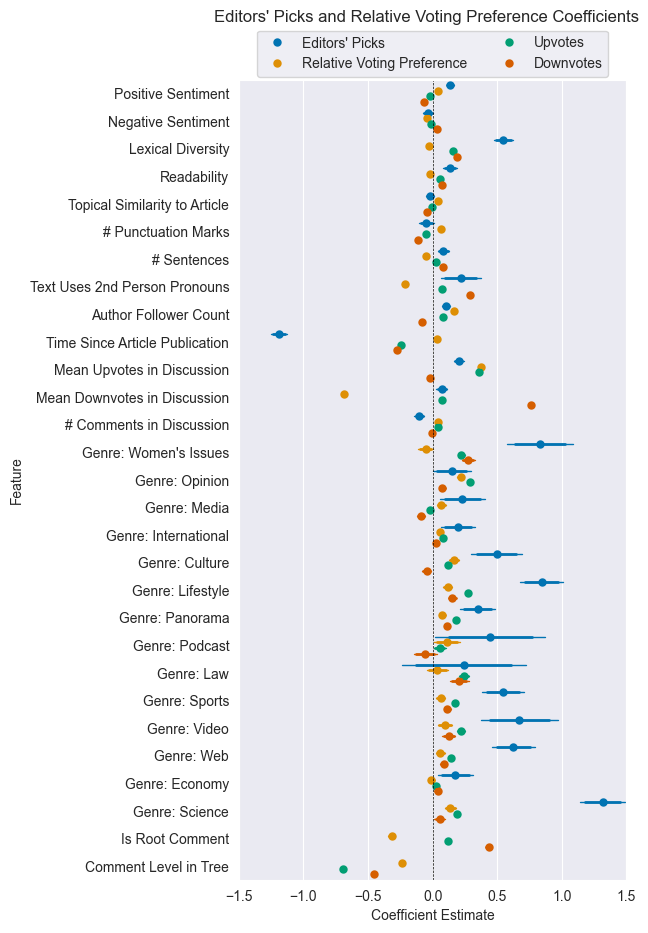

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 10))
sns.pointplot(data=pin_vs_votes, x='estimate', y='Feature', hue='Outcome', ax=ax,
            palette=sns.color_palette('colorblind', 4), linestyles=['', '', '', ''], ms=4)
offset = 0.1
nn = 30
ax.get_lines()[0].set_ydata([x-3*offset for x in range(nn-1)])
ax.get_lines()[nn].set_ydata([x-offset for x in range(nn-1)])
ax.get_lines()[2*nn].set_ydata([x+offset for x in range(nn-1)])
ax.get_lines()[3*nn].set_ydata([x+3*offset for x in range(nn-1)])
ym = {"Editors' Picks": -3, 'Relative Voting Preference': -1, 'Upvotes': 1, 'Downvotes': 3}
feats = list(pin_vs_votes['Feature'].unique())
outs = list(pin_vs_votes['Outcome'].unique())
# add CIs to plot
for i, row in pin_vs_votes.iterrows():
    modelpn = ym[row['Outcome']]
    ys = [feats.index(row['Feature']) + modelpn*offset,
          feats.index(row['Feature']) + modelpn*offset]
    ci95 = [row['ci_lower_95'], row['ci_upper_95']]
    ci99 = [row['ci_lower_99'], row['ci_upper_99']]
    ax.plot(ci95, ys, color=sns.color_palette('colorblind', 4)[outs.index(row['Outcome'])],
            lw=2, alpha=1)
    ax.plot(ci99, ys, color=sns.color_palette('colorblind', 4)[outs.index(row['Outcome'])],
            lw=1, alpha=1)
    
ax.axvline(0, color='k', lw=0.5, ls='--')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(28.5, -0.5)
ax.set_xlabel('Coefficient Estimate')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.07), ncols=2)
fig.suptitle('Editors\' Picks and Relative Voting Preference Coefficients')
fig.subplots_adjust(top=0.91)
fig.savefig('figs/pinvoteslong.pdf', bbox_inches='tight')
fig.savefig('figs/pinvoteslong.svg', bbox_inches='tight')

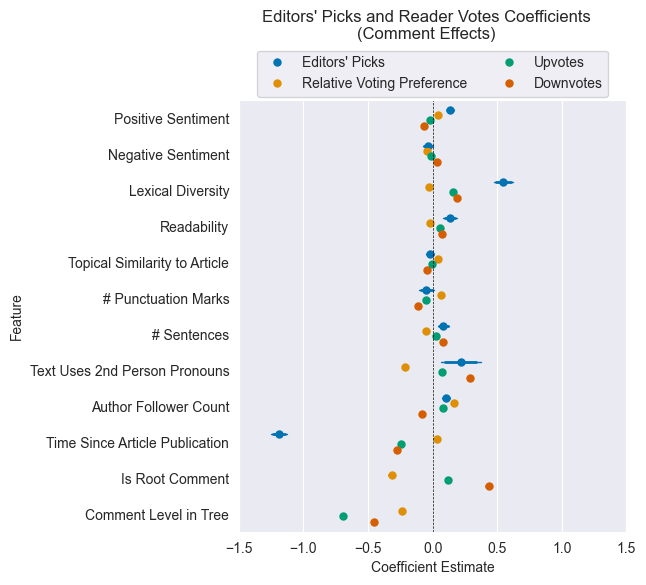

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
sns.pointplot(data=pin_vs_votes_comment, x='estimate', y='Feature', hue='Outcome', ax=ax,
            palette=sns.color_palette('colorblind', 4), linestyles=['', '', '', ''], ms=4)
offset = 0.075
nn = 13
ax.get_lines()[0].set_ydata([x-3*offset for x in range(nn-1)])
ax.get_lines()[nn].set_ydata([x-offset for x in range(nn-1)])
ax.get_lines()[2*nn].set_ydata([x+offset for x in range(nn-1)])
ax.get_lines()[3*nn].set_ydata([x+3*offset for x in range(nn-1)])
ym = {"Editors' Picks": -3, 'Relative Voting Preference': -1, 'Upvotes': 1, 'Downvotes': 3}
feats = list(pin_vs_votes_comment['Feature'].unique())
outs = list(pin_vs_votes_comment['Outcome'].unique())
# add CIs to plot
for i, row in pin_vs_votes_comment.iterrows():
    modelpn = ym[row['Outcome']]
    ys = [feats.index(row['Feature']) + modelpn*offset,
          feats.index(row['Feature']) + modelpn*offset]
    ci95 = [row['ci_lower_95'], row['ci_upper_95']]
    ci99 = [row['ci_lower_99'], row['ci_upper_99']]
    ax.plot(ci95, ys, color=sns.color_palette('colorblind', 4)[outs.index(row['Outcome'])],
            lw=2, alpha=1)
    ax.plot(ci99, ys, color=sns.color_palette('colorblind', 4)[outs.index(row['Outcome'])],
            lw=1, alpha=1)
    
ax.axvline(0, color='k', lw=0.5, ls='--')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(11.5, -0.5)
ax.set_xlabel('Coefficient Estimate')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncols=2)
fig.suptitle('Editors\' Picks and Reader Votes Coefficients\n(Comment Effects)')
fig.subplots_adjust(top=0.83)
fig.savefig('figs/pinvotescomment.pdf', bbox_inches='tight')
fig.savefig('figs/pinvotescomment.svg', bbox_inches='tight')


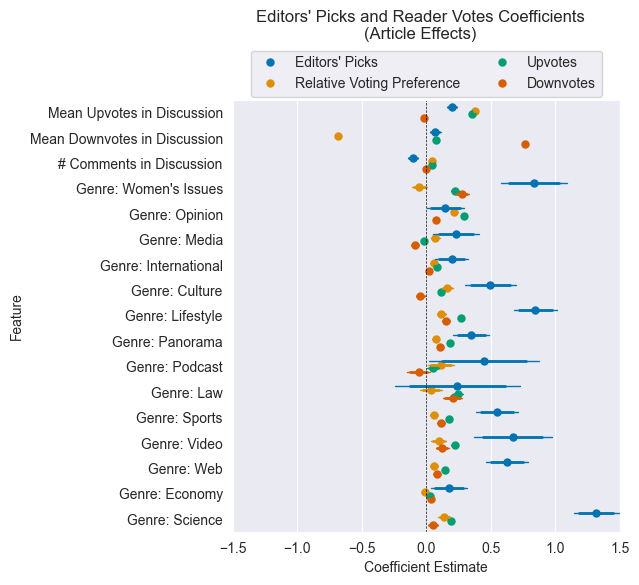

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
sns.pointplot(data=pin_vs_votes_article, x='estimate', y='Feature', hue='Outcome', ax=ax,
            palette=sns.color_palette('colorblind', 4), linestyles=['', '', '', ''], ms=4)
offset = 0.075
nn = 18
ax.get_lines()[0].set_ydata([x-3*offset for x in range(nn-1)])
ax.get_lines()[nn].set_ydata([x-offset for x in range(nn-1)])
ax.get_lines()[2*nn].set_ydata([x+offset for x in range(nn-1)])
ax.get_lines()[3*nn].set_ydata([x+3*offset for x in range(nn-1)])
ym = {"Editors' Picks": -3, 'Relative Voting Preference': -1, 'Upvotes': 1, 'Downvotes': 3}
feats = list(pin_vs_votes_article['Feature'].unique())
outs = list(pin_vs_votes_article['Outcome'].unique())
# add CIs to plot
for i, row in pin_vs_votes_article.iterrows():
    modelpn = ym[row['Outcome']]
    ys = [feats.index(row['Feature']) + modelpn*offset,
          feats.index(row['Feature']) + modelpn*offset]
    ci95 = [row['ci_lower_95'], row['ci_upper_95']]
    ci99 = [row['ci_lower_99'], row['ci_upper_99']]
    ax.plot(ci95, ys, color=sns.color_palette('colorblind', 4)[outs.index(row['Outcome'])],
            lw=2, alpha=1)
    ax.plot(ci99, ys, color=sns.color_palette('colorblind', 4)[outs.index(row['Outcome'])],
            lw=1, alpha=1)
    
ax.axvline(0, color='k', lw=0.5, ls='--')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(16.5, -0.5)
ax.set_xlabel('Coefficient Estimate')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncols=2)
fig.suptitle('Editors\' Picks and Reader Votes Coefficients\n(Article Effects)')
fig.subplots_adjust(top=0.83)
fig.savefig('figs/pinvotesarticle.pdf', bbox_inches='tight')
fig.savefig('figs/pinvotesarticle.svg', bbox_inches='tight')

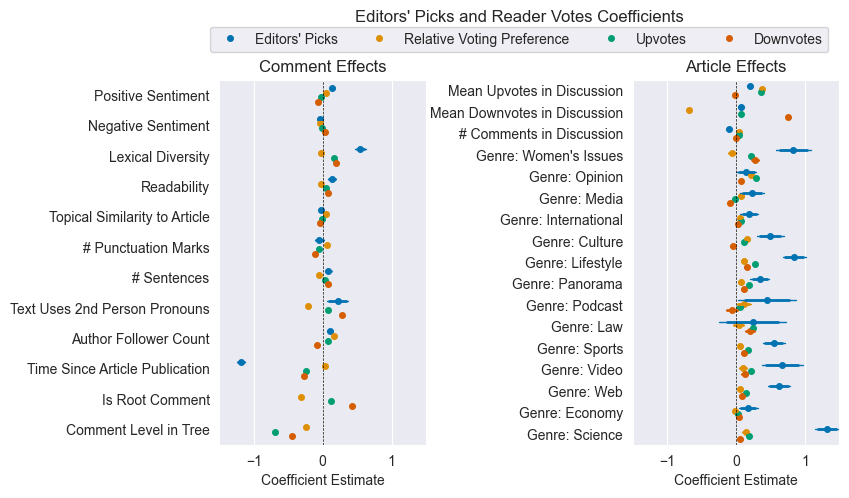

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ax = axs[0]
sns.pointplot(data=pin_vs_votes_comment, x='estimate', y='Feature', hue='Outcome', ax=ax,
            palette=sns.color_palette('colorblind', 4), linestyles=['', '', '', ''], ms=3)
offset = 0.075
nn = 13
ax.get_lines()[0].set_ydata([x-3*offset for x in range(nn-1)])
ax.get_lines()[nn].set_ydata([x-offset for x in range(nn-1)])
ax.get_lines()[2*nn].set_ydata([x+offset for x in range(nn-1)])
ax.get_lines()[3*nn].set_ydata([x+3*offset for x in range(nn-1)])
ym = {"Editors' Picks": -3, 'Relative Voting Preference': -1, 'Upvotes': 1, 'Downvotes': 3}
feats = list(pin_vs_votes_comment['Feature'].unique())
outs = list(pin_vs_votes_comment['Outcome'].unique())
# add CIs to plot
for i, row in pin_vs_votes_comment.iterrows():
    modelpn = ym[row['Outcome']]
    ys = [feats.index(row['Feature']) + modelpn*offset,
          feats.index(row['Feature']) + modelpn*offset]
    ci95 = [row['ci_lower_95'], row['ci_upper_95']]
    ci99 = [row['ci_lower_99'], row['ci_upper_99']]
    ax.plot(ci95, ys, color=sns.color_palette('colorblind', 4)[outs.index(row['Outcome'])],
            lw=2, alpha=1)
    ax.plot(ci99, ys, color=sns.color_palette('colorblind', 4)[outs.index(row['Outcome'])],
            lw=1, alpha=1)
    
ax.axvline(0, color='k', lw=0.5, ls='--')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(11.5, -0.5)
ax.set_xlabel('Coefficient Estimate')
ax.set_ylabel('')
ax.set_title('Comment Effects')
ax.legend().remove()

ax = axs[1]
sns.pointplot(data=pin_vs_votes_article, x='estimate', y='Feature', hue='Outcome', ax=ax,
            palette=sns.color_palette('colorblind', 4), linestyles=['', '', '', ''], ms=3)
nn = 18
ax.get_lines()[0].set_ydata([x-3*offset for x in range(nn-1)])
ax.get_lines()[nn].set_ydata([x-offset for x in range(nn-1)])
ax.get_lines()[2*nn].set_ydata([x+offset for x in range(nn-1)])
ax.get_lines()[3*nn].set_ydata([x+3*offset for x in range(nn-1)])
feats = list(pin_vs_votes_article['Feature'].unique())
outs = list(pin_vs_votes_article['Outcome'].unique())
# add CIs to plot
for i, row in pin_vs_votes_article.iterrows():
    modelpn = ym[row['Outcome']]
    ys = [feats.index(row['Feature']) + modelpn*offset,
          feats.index(row['Feature']) + modelpn*offset]
    ci95 = [row['ci_lower_95'], row['ci_upper_95']]
    ci99 = [row['ci_lower_99'], row['ci_upper_99']]
    ax.plot(ci95, ys, color=sns.color_palette('colorblind', 4)[outs.index(row['Outcome'])],
            lw=2, alpha=1)
    ax.plot(ci99, ys, color=sns.color_palette('colorblind', 4)[outs.index(row['Outcome'])],
            lw=1, alpha=1)
    
ax.axvline(0, color='k', lw=0.5, ls='--')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(16.5, -0.5)
ax.set_xlabel('Coefficient Estimate')
ax.set_ylabel('')
ax.set_title('Article Effects')
ax.legend().remove()
# get handles and labels
handles, labels = axs[1].get_legend_handles_labels()

fig.legend(handles=handles, labels=labels, 
    loc='upper center', bbox_to_anchor=(0.5, 0.96), ncols=4)
fig.suptitle('Editors\' Picks and Reader Votes Coefficients')
fig.subplots_adjust(top=0.84, wspace=1)
fig.savefig('figs/pinvoteswide.pdf', bbox_inches='tight')
fig.savefig('figs/pinvoteswide.svg', bbox_inches='tight')

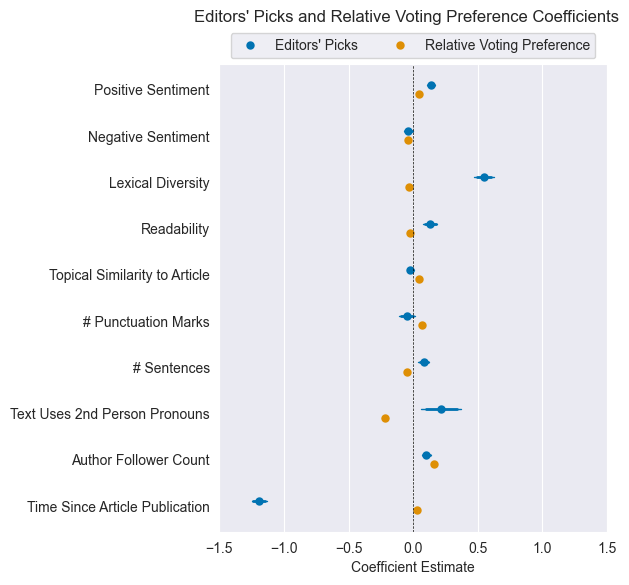

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
sns.pointplot(data=pin_vs_vc_comment, x='estimate', y='Feature', hue='Outcome', ax=ax,
            palette=sns.color_palette('colorblind', 2), linestyles=['', ''], ms=4)
offset = 0.1
ax.get_lines()[0].set_ydata([x-offset for x in range(10)])
ax.get_lines()[11].set_ydata([x+offset for x in range(10)])
# add CIs to plot
ym = {"Editors' Picks": -1, 'Relative Voting Preference': 1}
feats = list(pin_vs_vc_comment['Feature'].unique())
outs = list(pin_vs_vc_comment['Outcome'].unique())
# add CIs to plot
for i, row in pin_vs_vc_comment.iterrows():
    modelpn = ym[row['Outcome']]
    ys = [feats.index(row['Feature']) + modelpn*offset,
          feats.index(row['Feature']) + modelpn*offset]
    ci95 = [row['ci_lower_95'], row['ci_upper_95']]
    ci99 = [row['ci_lower_99'], row['ci_upper_99']]
    ax.plot(ci95, ys, color=sns.color_palette('colorblind', 2)[outs.index(row['Outcome'])],
            lw=2, alpha=1)
    ax.plot(ci99, ys, color=sns.color_palette('colorblind', 2)[outs.index(row['Outcome'])],
            lw=1, alpha=1)

ax.axvline(0, color='k', lw=0.5, ls='--')

ax.set_xlim(-1.5, 1.5)
ax.set_xlabel('Coefficient Estimate')
ax.set_ylabel('')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncols=2)
fig.suptitle('Editors\' Picks and Relative Voting Preference Coefficients')
fig.subplots_adjust(top=0.89)
fig.savefig('figs/pincompoundvotes_comment.pdf', bbox_inches='tight')
fig.savefig('figs/pincompoundvotes_comment.svg', bbox_inches='tight')

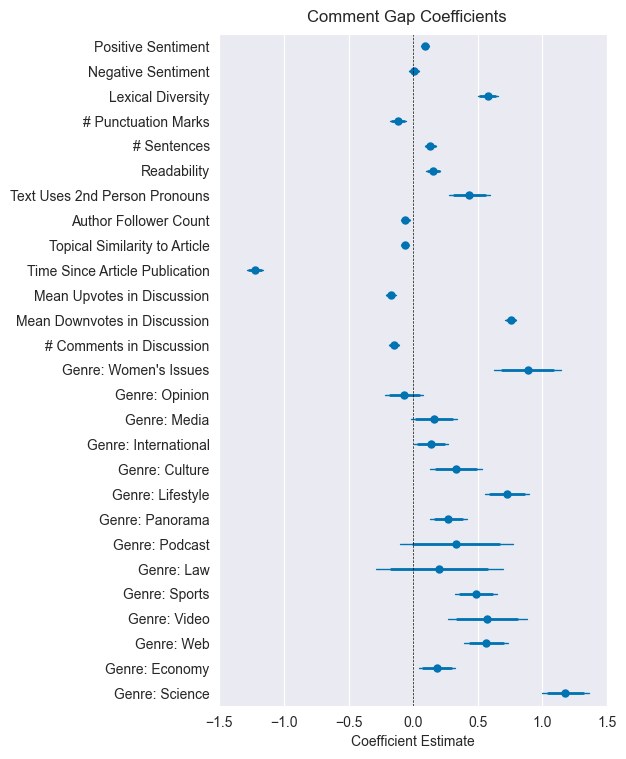

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 8))
sns.pointplot(data=pinvc_diff, x='coef_diff', y='Feature', linestyles='', ms=4, ax=ax)
for i, row in pinvc_diff.iterrows():
    ci95 = [row['ci_lower_95'], row['ci_upper_95']]
    ci99 = [row['ci_lower_99'], row['ci_upper_99']]
    ax.plot(ci95, [i, i], color=sns.color_palette('colorblind', 2)[0],
            lw=2, alpha=1)
    ax.plot(ci99, [i, i], color=sns.color_palette('colorblind', 2)[0],
            lw=1, alpha=1)

props = dict(boxstyle='round', alpha=0.2, facecolor='k')
ax.axvline(0, color='k', lw=0.5, ls='--')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(26.5, -0.5)
ax.set_xlabel('Coefficient Estimate')
ax.set_ylabel('')
fig.suptitle('Comment Gap Coefficients')
fig.subplots_adjust(top=0.95)
fig.savefig('figs/pinvscompoundlong.pdf', bbox_inches='tight')
fig.savefig('figs/pinvscompoundlong.svg', bbox_inches='tight')


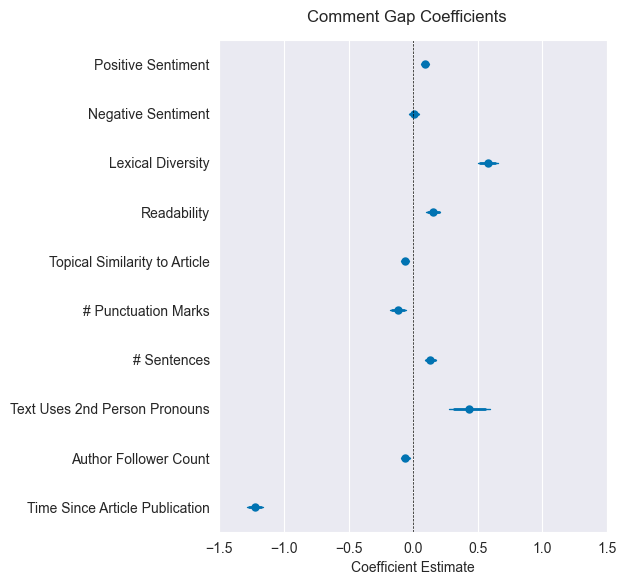

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
sns.pointplot(data=pinvc_diff_comment, x='coef_diff', y='Feature', linestyles='', ms=4, ax=ax)
for i, row in pinvc_diff_comment.iterrows():
    ci95 = [row['ci_lower_95'], row['ci_upper_95']]
    ci99 = [row['ci_lower_99'], row['ci_upper_99']]
    ax.plot(ci95, [i, i], color=sns.color_palette('colorblind', 2)[0],
            lw=2, alpha=1)
    ax.plot(ci99, [i, i], color=sns.color_palette('colorblind', 2)[0],
            lw=1, alpha=1)

props = dict(boxstyle='round', alpha=0.2, facecolor='k')
ax.axvline(0, color='k', lw=0.5, ls='--')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(9.5, -0.5)
ax.set_xlabel('Coefficient Estimate')
ax.set_ylabel('')

fig.suptitle('Comment Gap Coefficients')
fig.subplots_adjust(top=0.93)
fig.savefig('figs/pinvscompoundcomment.pdf', bbox_inches='tight')
fig.savefig('figs/pinvscompoundcomment.svg', bbox_inches='tight')


/var/folders/3m/k3bhjj_54975gvpvvrkv8x6w0000gn/T/ipykernel_75759/1605284502.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


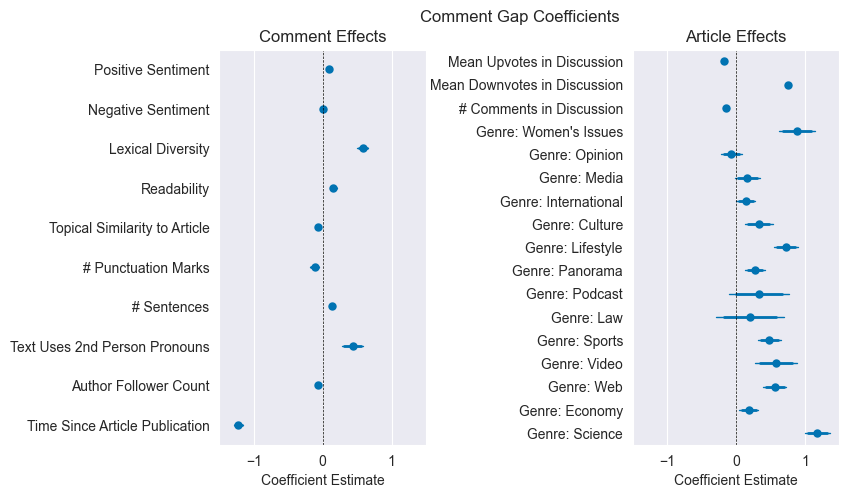

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ax = axs[0]
sns.pointplot(data=pinvc_diff_comment, x='coef_diff', y='Feature', ax=ax,
             linestyles='', ms=4)
offset = 0.075
nn = 13
feats = list(pinvc_diff_comment['Feature'].unique())
# add CIs to plot
for i, row in pinvc_diff_comment.iterrows():
    ys = [feats.index(row['Feature']),
          feats.index(row['Feature'])]
    ci95 = [row['ci_lower_95'], row['ci_upper_95']]
    ci99 = [row['ci_lower_99'], row['ci_upper_99']]
    ax.plot(ci95, ys, color=sns.color_palette('colorblind', 2)[0],
            lw=2, alpha=1)
    ax.plot(ci99, ys, color=sns.color_palette('colorblind', 2)[0],
            lw=1, alpha=1)
    
ax.axvline(0, color='k', lw=0.5, ls='--')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(9.5, -0.5)
ax.set_xlabel('Coefficient Estimate')
ax.set_ylabel('')
ax.set_title('Comment Effects')
ax.legend().remove()

ax = axs[1]
sns.pointplot(data=pinvc_diff_article, x='coef_diff', y='Feature', ax=ax,
             linestyles='', ms=4)
offset = 0.075
nn = 13
feats = list(pinvc_diff_article['Feature'].unique())
# add CIs to plot
for i, row in pinvc_diff_article.iterrows():
    ys = [feats.index(row['Feature']),
          feats.index(row['Feature'])]
    ci95 = [row['ci_lower_95'], row['ci_upper_95']]
    ci99 = [row['ci_lower_99'], row['ci_upper_99']]
    ax.plot(ci95, ys, color=sns.color_palette('colorblind', 2)[0],
            lw=2, alpha=1)
    ax.plot(ci99, ys, color=sns.color_palette('colorblind', 2)[0],
            lw=1, alpha=1)
    
ax.axvline(0, color='k', lw=0.5, ls='--')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(16.5, -0.5)
ax.set_xlabel('Coefficient Estimate')
ax.set_ylabel('')

ax.set_title('Article Effects')

fig.suptitle('Comment Gap Coefficients')
fig.subplots_adjust(top=0.9, wspace=1)
fig.savefig('figs/pinvscompoundwide.pdf', bbox_inches='tight')
fig.savefig('figs/pinvscompoundwide.svg', bbox_inches='tight')